# ArXiv Abstract Analysis with LSTM
Nama: Bryan Herdianto  
Email: bryan.herdianto17@gmail.com

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/data-science-mini-projects/main/arxiv-abstract-analysis/arxiv34k6L.csv')
df

,Abstracts,categories
0,Reusing features in deep networks through dens...,['cs.CV']
1,Visual defect detection (VDD) for high-mix low...,['cs.CV']
2,Dense object detectors rely on the sliding-win...,['cs.CV']
3,The state-of-the-art object detection and imag...,['cs.CV']
4,This paper explores self-supervised learning o...,['cs.CV']
...,...,...
34063,Spatiotemporal time series is the foundation o...,"['cs.LG', 'stat.ML']"
34064,The wide-spread adoption of representation lea...,"['cs.LG', 'stat.ML']"
34065,This work pioneers regret analysis of risk-sen...,"['cs.LG', 'stat.ML']"
34066,Graphs arise naturally in many real-world appl...,"['cs.LG', 'stat.ML']"


In [2]:
category = pd.get_dummies(df.categories)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='categories')
df_baru

,Abstracts,"['cs.CV', 'cs.AI']","['cs.CV', 'cs.LG']",['cs.CV'],"['cs.LG', 'cs.AI']","['cs.LG', 'stat.ML']",['cs.LG']
0,Reusing features in deep networks through dens...,False,False,True,False,False,False
1,Visual defect detection (VDD) for high-mix low...,False,False,True,False,False,False
2,Dense object detectors rely on the sliding-win...,False,False,True,False,False,False
3,The state-of-the-art object detection and imag...,False,False,True,False,False,False
4,This paper explores self-supervised learning o...,False,False,True,False,False,False
...,...,...,...,...,...,...,...
34063,Spatiotemporal time series is the foundation o...,False,False,False,False,True,False
34064,The wide-spread adoption of representation lea...,False,False,False,False,True,False
34065,This work pioneers regret analysis of risk-sen...,False,False,False,False,True,False
34066,Graphs arise naturally in many real-world appl...,False,False,False,False,True,False


In [46]:
abstraksi = df_baru['Abstracts'].values
label = df_baru[["['cs.CV', 'cs.AI']", "['cs.CV', 'cs.LG']", "['cs.CV']", "['cs.LG', 'cs.AI']", "['cs.LG', 'stat.ML']", "['cs.LG']"]].values

In [4]:
from sklearn.model_selection import train_test_split

abstraksi_train, abstraksi_test, label_train, label_test = train_test_split(abstraksi, label, test_size=0.2, stratify=label)

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(abstraksi_train)

sekuens_train = tokenizer.texts_to_sequences(abstraksi_train)
sekuens_test = tokenizer.texts_to_sequences(abstraksi_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [64]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[early_stopping])

Epoch 1/30
852/852 - 544s - loss: 1.3399 - accuracy: 0.4238 - val_loss: 1.2176 - val_accuracy: 0.4526 - 544s/epoch - 639ms/step
Epoch 2/30
852/852 - 523s - loss: 1.1774 - accuracy: 0.4561 - val_loss: 1.2381 - val_accuracy: 0.4522 - 523s/epoch - 614ms/step
Epoch 3/30
852/852 - 523s - loss: 1.1181 - accuracy: 0.4847 - val_loss: 1.1620 - val_accuracy: 0.4765 - 523s/epoch - 614ms/step
Epoch 4/30
852/852 - 528s - loss: 1.0323 - accuracy: 0.5322 - val_loss: 1.1513 - val_accuracy: 0.4966 - 528s/epoch - 619ms/step
Epoch 5/30
852/852 - 525s - loss: 0.9560 - accuracy: 0.5820 - val_loss: 1.1631 - val_accuracy: 0.5043 - 525s/epoch - 616ms/step
Epoch 6/30
852/852 - 520s - loss: 0.8666 - accuracy: 0.6329 - val_loss: 1.2250 - val_accuracy: 0.4990 - 520s/epoch - 611ms/step
Epoch 7/30
852/852 - 524s - loss: 0.7794 - accuracy: 0.6795 - val_loss: 1.2240 - val_accuracy: 0.5270 - 524s/epoch - 615ms/step


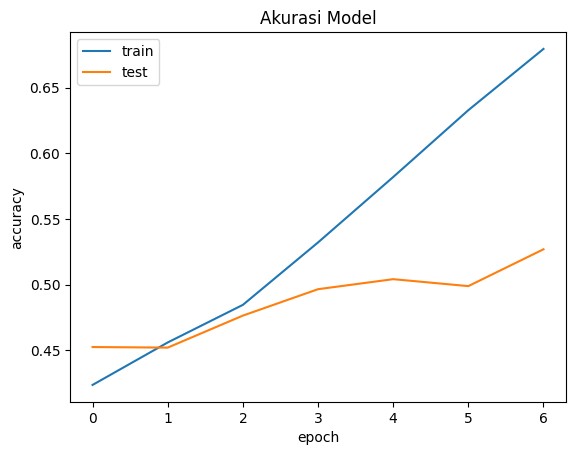

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

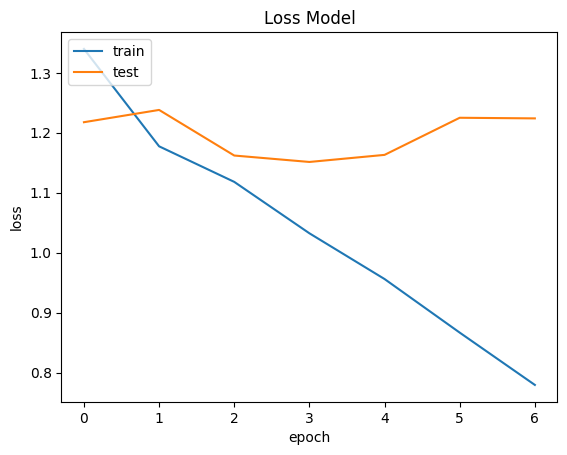

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
df[df['categories'] == "['cs.LG']"]

,Abstracts,categories
15528,Temporal Point Processes (TPP) play an importa...,['cs.LG']
15529,Forecasts are typically not produced in a vacu...,['cs.LG']
15530,The fundamental principle of Graph Neural Netw...,['cs.LG']
15531,The problem of offline reinforcement learning ...,['cs.LG']
15532,The recent success of multiple neural architec...,['cs.LG']
...,...,...
23663,Safety is a primary concern when applying rein...,['cs.LG']
23664,Exploration is a significant challenge in prac...,['cs.LG']
23665,We present IBSEAD or distributed autonomous en...,['cs.LG']
23666,Asymmetrical distance structures (quasimetrics...,['cs.LG']


In [70]:
import numpy as np

index = 23

# testing model on specific input
input = df['Abstracts'][index]
padded_input = pad_sequences(tokenizer.texts_to_sequences(input))

# Predict the result
predicted_result = model.predict(padded_input)

predicted_class = np.argmax(predicted_result, axis=1)[0]  # Get the index of the highest probability

# Define the class index to label mapping
index_to_label = {0: "['cs.CV', 'cs.AI']", 1: "['cs.CV', 'cs.LG']", 2: "['cs.CV']", 3: "['cs.LG', 'cs.AI']", 4: "['cs.LG', 'stat.ML']", 5: "['cs.LG']"}  # Add all class indices and their labels

# Convert the predicted index to a string label
predicted_label = index_to_label[predicted_class]

real_result = df['categories'][index]

print("Input:\n" + input)
print("\nPredicted Result:\n" + predicted_label)
print("\nReal Result:\n" + real_result)

46/46 [==============================] - 0s 2ms/step
Input:
Despite the importance of unsupervised object detection, to the best of our
knowledge, there is no previous work addressing this problem. One main issue,
widely known to the community, is that object boundaries derived only from 2D
image appearance are ambiguous and unreliable. To address this, we exploit
LiDAR clues to aid unsupervised object detection. By exploiting the 3D scene
structure, the issue of localization can be considerably mitigated. We further
identify another major issue, seldom noticed by the community, that the
long-tailed and open-ended (sub-)category distribution should be accommodated.
In this paper, we present the first practical method for unsupervised object
detection with the aid of LiDAR clues. In our approach, candidate object
segments based on 3D point clouds are firstly generated. Then, an iterative
segment labeling process is conducted to assign segment labels and to train a
segment labeling netwo